In [215]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

dataset_url = "https://raw.githubusercontent.com/Faizal215/cubas/main/out1.csv"
df = pd.read_csv(dataset_url, dtype = {'Status': str})

#df.info()

In [216]:
#df.info()
df.head(5)

,oneNormAcc1,meanAcc1,maxAcc1,kurAcc1,varAcc1,oneNormAcc2,meanAcc2,maxAcc2,kurAcc2,varAcc2,...,meanAcc2f,maxAcc2f,kurAcc2f,varAcc2f,oneNormSPf,meanSPf,maxSPf,kurSPf,varSPf,Status
0,252355.5238,-2.040000e-05,1.771526,3.369627,0.102191,236545.5182,-0.000014,2.581460,3.782630,0.093920,...,0.000588,0.035042,230.314873,8.760000e-07,2.454068,0.000150,0.007444,68.290202,9.470000e-08,developing
1,254551.4318,-8.550000e-07,1.916687,3.401545,0.104665,238521.4510,0.000004,3.433707,3.936618,0.096439,...,0.000589,0.024459,118.900212,7.530000e-07,2.487198,0.000152,0.007132,63.583436,9.180000e-08,developing
2,251983.2009,-4.160000e-06,1.721612,3.423726,0.103383,234660.8963,-0.000008,3.271788,3.954837,0.094232,...,0.000545,0.024901,151.750491,6.500000e-07,2.810794,0.000172,0.006617,46.840076,1.200000e-07,developing
3,237783.2658,-1.280000e-05,1.658815,3.505458,0.094610,224732.8435,0.000010,2.065285,3.850284,0.088012,...,0.000528,0.027340,163.963855,6.230000e-07,2.389521,0.000146,0.007848,82.850138,8.140000e-08,developing
4,262471.7945,-1.810000e-05,1.982674,3.334628,0.109602,252981.8743,-0.000019,2.504297,3.721686,0.106695,...,0.000538,0.026176,166.086754,6.620000e-07,2.809236,0.000171,0.007704,53.675009,1.160000e-07,developing


In [217]:
df['Status'] = df['Status'].map({'unstable':5,'severe':4,'mild':3,'developing':2,'inception':1,'healthy':0})



#print(df.to_string())

train, test = train_test_split(df, test_size = 0.2)

features = [ 'oneNormAcc1','meanAcc1', 'maxAcc1', 'kurAcc1', 'varAcc1','oneNormAcc2','meanAcc2', 'maxAcc2', 'kurAcc2', 'varAcc2','oneNormSP', 'meanSP', 'maxSP' ,
            'kurSP', 'varSP', 'oneNormAcc1f', 'meanAcc1f', 'maxAcc1f', 'kurAcc1f', 'varAcc1f', 'oneNormAcc2f', 'meanAcc2f', 'maxAcc2f', 'kurAcc2f', 'varAcc2f', 'oneNormSPf', 'meanSPf', 'maxSPf', 'kurSPf', 'varSPf' ]

train_X = train[features]
train_y =train.Status

test_X = test[features]
test_y = test.Status

In [218]:
#df.head(5)

In [219]:
#print(train_y)

In [220]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(train_X,train_y)

prediction = model.predict(test_X)
print(prediction)
metrics.accuracy_score(prediction,test_y)

[3 0 1 3 2 5 0 4 4 4 4 0 0 0 3 3 5 0 1 5 0 4 2 0 5 0 3 2 3 3 2 5 1 5 3 4 2
 2 2 1]


0.95

In [221]:
test_X.columns

Index(['oneNormAcc1', 'meanAcc1', 'maxAcc1', 'kurAcc1', 'varAcc1',
       'oneNormAcc2', 'meanAcc2', 'maxAcc2', 'kurAcc2', 'varAcc2', 'oneNormSP',
       'meanSP', 'maxSP', 'kurSP', 'varSP', 'oneNormAcc1f', 'meanAcc1f',
       'maxAcc1f', 'kurAcc1f', 'varAcc1f', 'oneNormAcc2f', 'meanAcc2f',
       'maxAcc2f', 'kurAcc2f', 'varAcc2f', 'oneNormSPf', 'meanSPf', 'maxSPf',
       'kurSPf', 'varSPf'],
      dtype='object')

In [222]:
data = [[262355.5238,-2.05E-05,1.871526456,3.469626758,0.202190858,236545.5182,-0.0000142, 2.581459761,3.782630043,0.093920181,199619.0538, 0.000871174, 1.111190319, 3.104222527, 0.060525557, 14.95790769, 0.000912958, 0.083375223, 369.4315153, 0.00000453, 9.637587539, 0.000588232, 0.035041776, 230.3148731, 8.76e-7,2.454067899,0.000149784, 0.007444129, 68.29020247,9.47e-8]]

# New dataframe for only the columns of interest
dfNew = pd.DataFrame(data, columns = ['oneNormAcc1', 'meanAcc1', 'maxAcc1', 'kurAcc1', 'varAcc1','oneNormAcc2', 'meanAcc2', 'maxAcc2', 'kurAcc2', 'varAcc2', 'oneNormSP','meanSP', 'maxSP', 'kurSP', 'varSP', 'oneNormAcc1f', 'meanAcc1f','maxAcc1f', 'kurAcc1f', 'varAcc1f', 'oneNormAcc2f', 'meanAcc2f','maxAcc2f', 'kurAcc2f', 'varAcc2f', 'oneNormSPf', 'meanSPf', 'maxSPf','kurSPf', 'varSPf'])
single = model.predict(dfNew)
print(single)

[2]


In [223]:
print(dfNew)

   oneNormAcc1  meanAcc1   maxAcc1   kurAcc1   varAcc1  oneNormAcc2  meanAcc2  \
0  262355.5238 -0.000021  1.871526  3.469627  0.202191  236545.5182 -0.000014   

   maxAcc2  kurAcc2  varAcc2  ...  oneNormAcc2f  meanAcc2f  maxAcc2f  \
0  2.58146  3.78263  0.09392  ...      9.637588   0.000588  0.035042   

     kurAcc2f      varAcc2f  oneNormSPf  meanSPf    maxSPf     kurSPf  \
0  230.314873  8.760000e-07    2.454068  0.00015  0.007444  68.290202   

         varSPf  
0  9.470000e-08  

[1 rows x 30 columns]


In [224]:
#print(test_X)

In [225]:
#print(test_y)

In [226]:
fname = 'PumpDiagnosticModel1.pkl'
pickle.dump(model, open(fname, 'wb'))

In [227]:
accuracy = accuracy_score(test_y, prediction)


In [228]:
print(accuracy)

0.95


In [229]:
# Calculate accuracy
accuracy = accuracy_score(test_y, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [230]:
# Calculate precision, recall, and F1-score
precision = precision_score(test_y, prediction, average='weighted')
recall = recall_score(test_y, prediction, average='weighted')
f1 = f1_score(test_y, prediction, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print confusion matrix
cm = confusion_matrix(test_y, prediction)
print("Confusion Matrix:")
print(cm)

Precision: 0.9642857142857142
Recall: 0.95
F1-score: 0.9491666666666667
Confusion Matrix:
[[9 0 0 0 0 0]
 [0 4 2 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


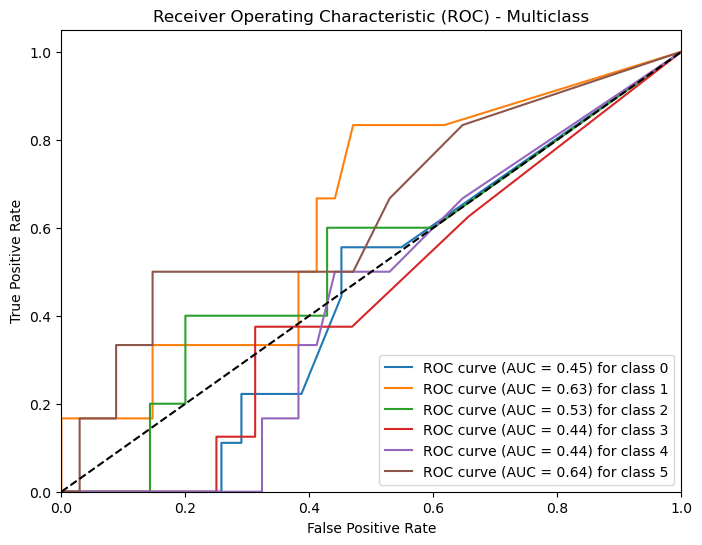

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
binarized_test_y = label_binarize(test_y, classes=np.unique(test_y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for class_label in np.unique(test_y):
    class_index = np.where(np.unique(test_y) == class_label)[0][0]
    fpr[class_label], tpr[class_label], _ = roc_curve(binarized_test_y[:, class_index], prediction_probabilities[:, class_index])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in np.unique(test_y):
    plt.plot(fpr[class_label], tpr[class_label], label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[class_label], class_label))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()



In [232]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate micro-averaged precision, recall, and F1-score
micro_precision = precision_score(test_y, prediction, average='micro')
micro_recall = recall_score(test_y, prediction, average='micro')
micro_f1 = f1_score(test_y, prediction, average='micro')

# Calculate macro-averaged precision, recall, and F1-score
macro_precision = precision_score(test_y, prediction, average='macro')
macro_recall = recall_score(test_y, prediction, average='macro')
macro_f1 = f1_score(test_y, prediction, average='macro')

# Print micro-averaged metrics
print("Micro-averaged Precision:", micro_precision)
print("Micro-averaged Recall:", micro_recall)
print("Micro-averaged F1-score:", micro_f1)

# Print macro-averaged metrics
print("Macro-averaged Precision:", macro_precision)
print("Macro-averaged Recall:", macro_recall)
print("Macro-averaged F1-score:", macro_f1)



Micro-averaged Precision: 0.95
Micro-averaged Recall: 0.95
Micro-averaged F1-score: 0.9500000000000001
Macro-averaged Precision: 0.9523809523809524
Macro-averaged Recall: 0.9444444444444443
Macro-averaged F1-score: 0.9388888888888888


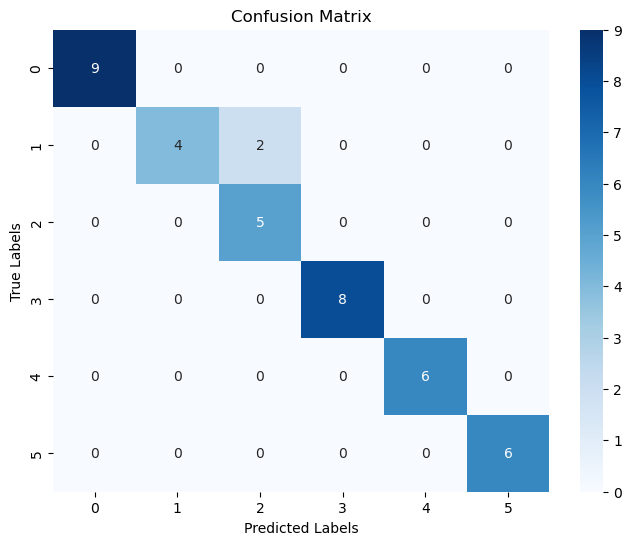

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate prediction probabilities
prediction_probabilities = model.predict_proba(test_X)
# Assuming you are using a binary classification model, use prediction probabilities of the positive class
positive_class_probabilities = prediction_probabilities[:, 1]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

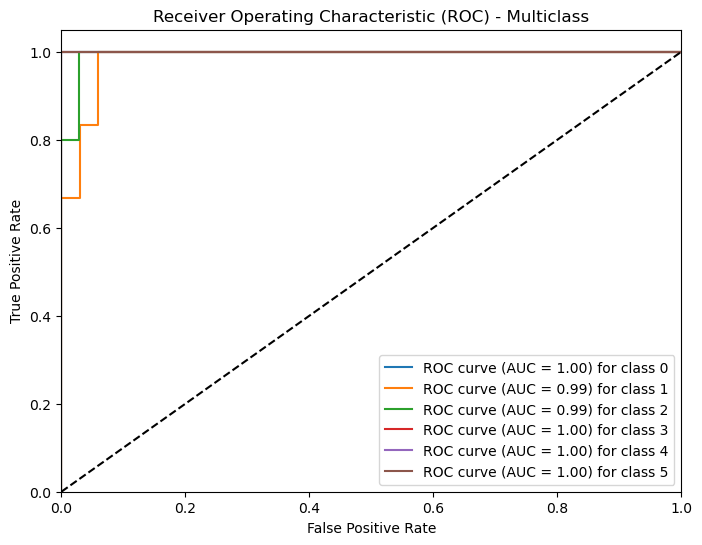

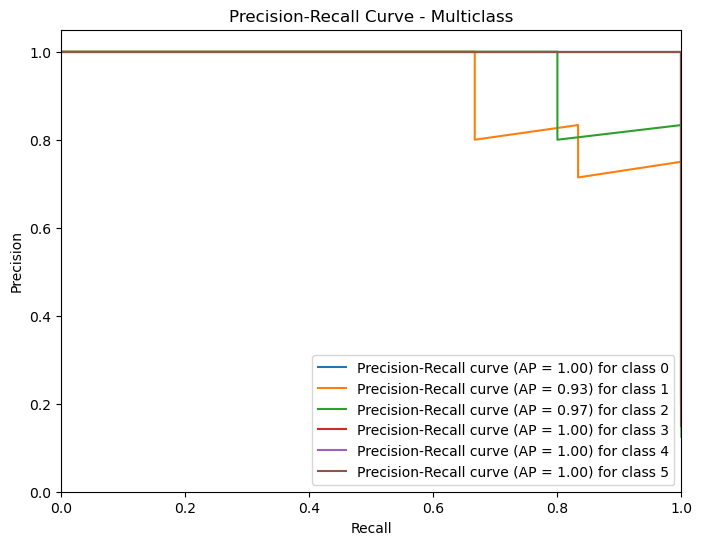

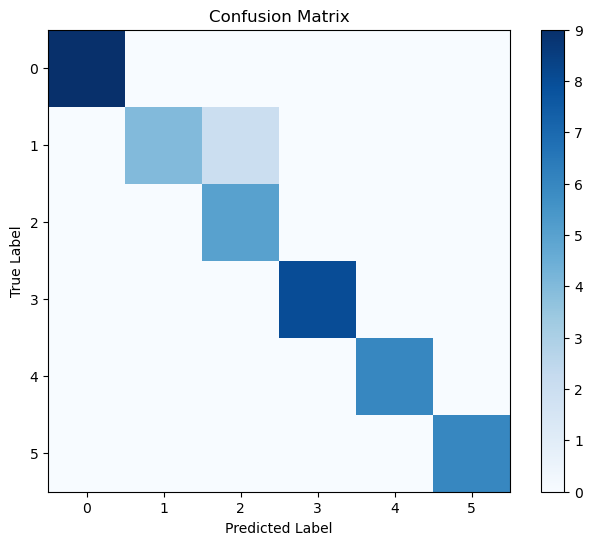

In [234]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
binarized_test_y = label_binarize(test_y, classes=np.unique(test_y))

# Compute predicted probabilities
prediction_probabilities = model.predict_proba(test_X)

# Plot ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for class_label in np.unique(test_y):
    class_index = np.where(np.unique(test_y) == class_label)[0][0]
    fpr[class_label], tpr[class_label], _ = roc_curve(binarized_test_y[:, class_index], prediction_probabilities[:, class_index])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

plt.figure(figsize=(8, 6))
for class_label in np.unique(test_y):
    plt.plot(fpr[class_label], tpr[class_label], label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[class_label], class_label))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for class_label in np.unique(test_y):
    class_index = np.where(np.unique(test_y) == class_label)[0][0]
    precision[class_label], recall[class_label], _ = precision_recall_curve(binarized_test_y[:, class_index], prediction_probabilities[:, class_index])
    average_precision[class_label] = average_precision_score(binarized_test_y[:, class_index], prediction_probabilities[:, class_index])

plt.figure(figsize=(8, 6))
for class_label in np.unique(test_y):
    plt.plot(recall[class_label], precision[class_label], label='Precision-Recall curve (AP = %0.2f) for class %s' % (average_precision[class_label], class_label))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(test_y, prediction)
classes = np.unique(test_y)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




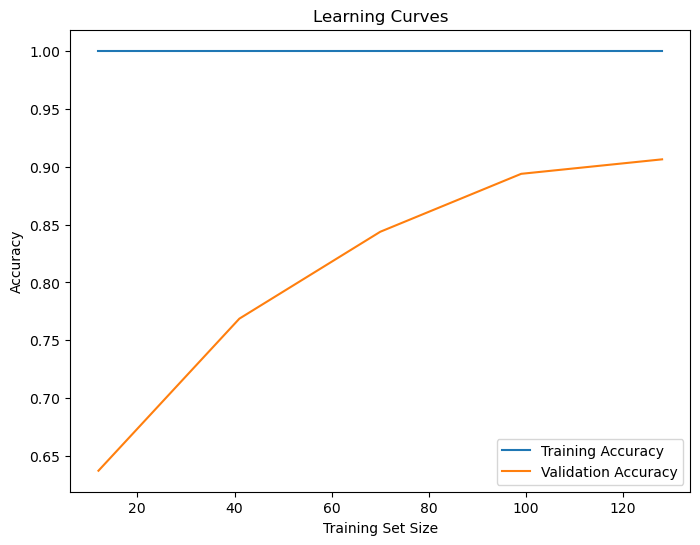

In [235]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model, train_X, train_y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, valid_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="lower right")
plt.show()



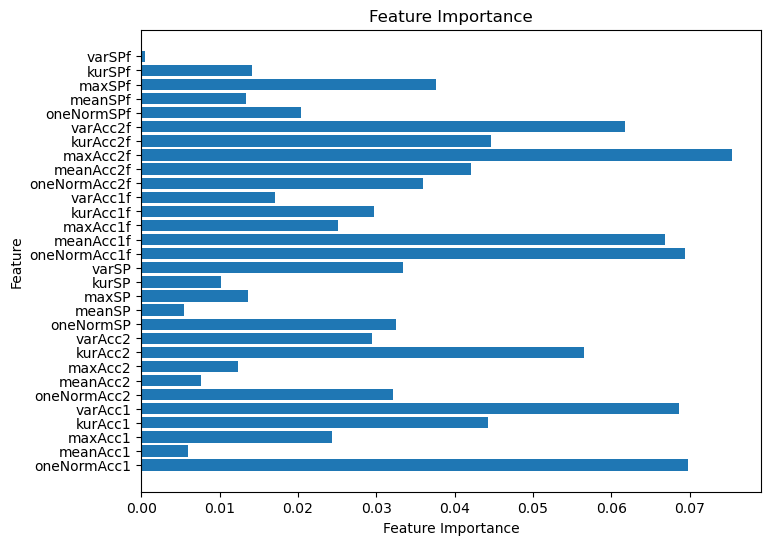

In [236]:
importances = model.feature_importances_
feature_names = train_X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


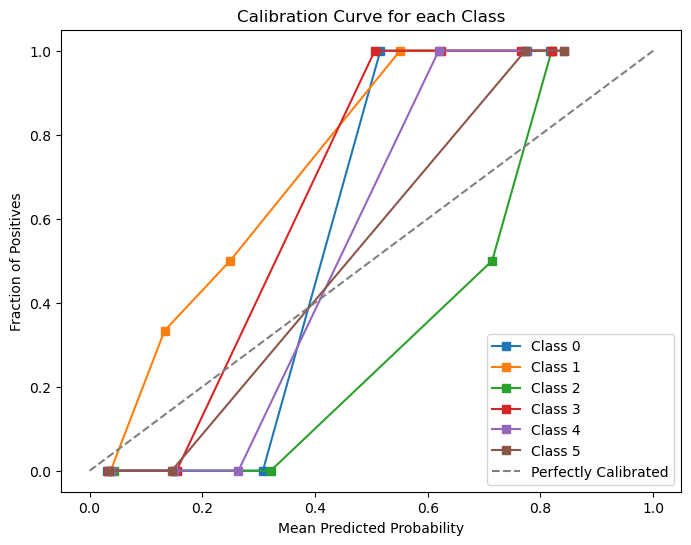

In [237]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import numpy as np

# Create a calibrated classifier
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(train_X, train_y)

# Get predicted probabilities for each class
probs = calibrated_clf.predict_proba(test_X)

# Calculate the Brier score loss for each class
num_classes = len(np.unique(train_y))
brier_scores = []
for class_index in range(num_classes):
    y_true_class = np.where(test_y == class_index, 1, 0)
    prob_class = probs[:, class_index]
    brier_scores.append(brier_score_loss(y_true_class, prob_class))

# Plot calibration curve for each class
plt.figure(figsize=(8, 6))
for class_index in range(num_classes):
    y_true_class = np.where(test_y == class_index, 1, 0)
    prob_class = probs[:, class_index]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true_class, prob_class, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', label=f'Class {class_index}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for each Class')
plt.legend(loc="lower right")
plt.show()






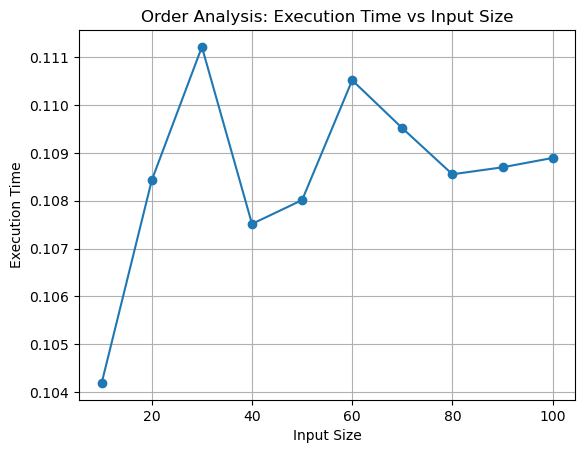

In [238]:
import time
import matplotlib.pyplot as plt

# Define the function or algorithm to be analyzed
def my_algorithm(input_size):
    # Perform some computations
    time.sleep(0.1)  # Simulate the algorithm's execution time

# Initialize lists to store input sizes and execution times
input_sizes = []
execution_times = []

# Vary the input size and measure the execution time
for input_size in range(10, 101, 10):  # Vary the input size from 10 to 100 in increments of 10
    start_time = time.time()
    my_algorithm(input_size)
    end_time = time.time()
    execution_time = end_time - start_time

    input_sizes.append(input_size)
    execution_times.append(execution_time)

# Plot the results
plt.plot(input_sizes, execution_times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Order Analysis: Execution Time vs Input Size')
plt.grid(True)
plt.show()


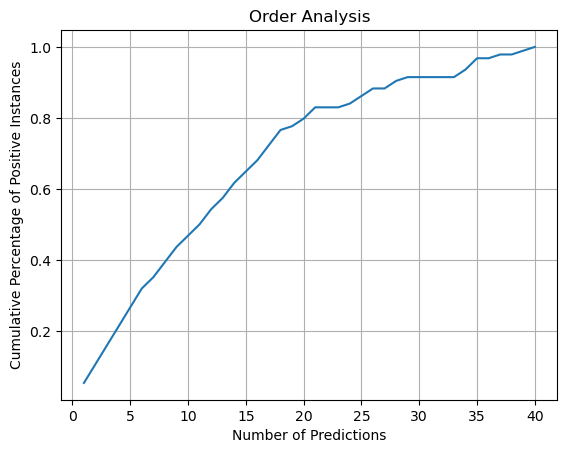

In [240]:
# Reset the index of test_y
test_y = test_y.reset_index(drop=True)

# Get the predicted probabilities for the positive class (class 5)
positive_class_probs = model.predict_proba(test_X)[:, 5]

# Sort the probabilities and corresponding labels in descending order
sorted_probs_indices = np.argsort(positive_class_probs)[::-1]
sorted_probs = positive_class_probs[sorted_probs_indices]
sorted_labels = test_y[sorted_probs_indices]

# Calculate the cumulative percentage of positive instances
cumulative_positives = np.cumsum(sorted_labels) / np.sum(sorted_labels)

# Plot the order analysis
plt.plot(np.arange(1, len(sorted_probs) + 1), cumulative_positives)
plt.xlabel('Number of Predictions')
plt.ylabel('Cumulative Percentage of Positive Instances')
plt.title('Order Analysis')
plt.grid(True)
plt.show()







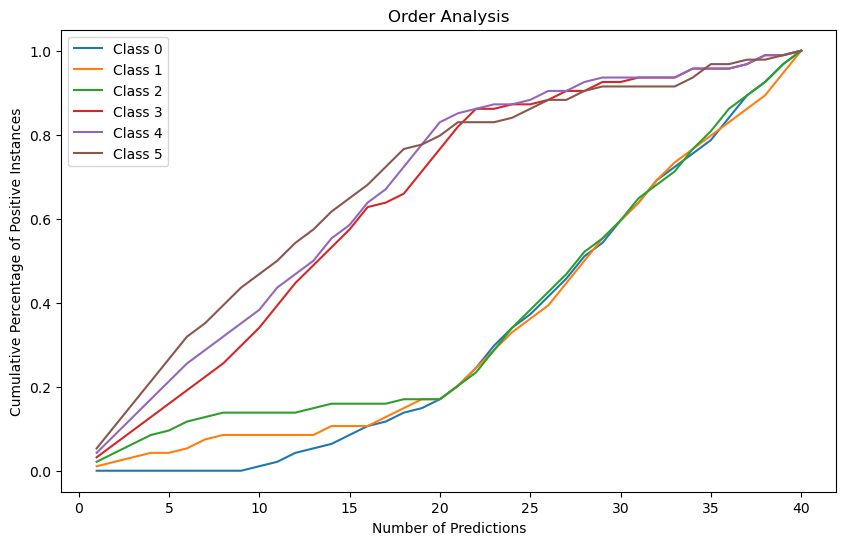

In [241]:
# Get the predicted probabilities for all classes
class_probs = model.predict_proba(test_X)

# Sort the probabilities in descending order for each class
sorted_probs_indices = np.argsort(class_probs, axis=0)[::-1]
sorted_probs = class_probs[sorted_probs_indices, np.arange(class_probs.shape[1])]

# Create an array to store the cumulative percentage of positive instances for each class
cumulative_positives = np.zeros_like(sorted_probs)

# Calculate the cumulative percentage of positive instances for each class
for class_index in range(class_probs.shape[1]):
    sorted_labels = test_y[sorted_probs_indices[:, class_index]]
    cumulative_positives[:, class_index] = np.cumsum(sorted_labels) / np.sum(sorted_labels)

# Plot the order analysis for each class
plt.figure(figsize=(10, 6))
for class_index in range(class_probs.shape[1]):
    plt.plot(np.arange(1, len(sorted_probs) + 1), cumulative_positives[:, class_index], label=f'Class {class_index}')
plt.xlabel('Number of Predictions')
plt.ylabel('Cumulative Percentage of Positive Instances')
plt.title('Order Analysis')
plt.legend()
plt.show()


In [242]:
from scipy.stats import chi2_contingency

# Perform chi-square test for each feature
chi2_stats = []
p_values = []

for feature in features:
    contingency_table = pd.crosstab(df[feature], df['Status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p_value)

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({'Feature': features, 'Chi2 Statistic': chi2_stats, 'p-value': p_values})

# Sort the results by p-value in ascending order
chi2_results.sort_values('p-value', inplace=True)

# Display the chi-square test results
print(chi2_results)


         Feature  Chi2 Statistic   p-value
24      varAcc2f      925.483405  0.002894
19      varAcc1f      794.660895  0.125454
29        varSPf      807.399711  0.169802
1       meanAcc1      931.832612  0.300374
2        maxAcc1     1000.000000  0.405572
12         maxSP     1000.000000  0.405572
26       meanSPf     1000.000000  0.449535
25    oneNormSPf     1000.000000  0.449535
28        kurSPf     1000.000000  0.449535
13         kurSP     1000.000000  0.449535
11        meanSP     1000.000000  0.449535
14         varSP     1000.000000  0.449535
9        varAcc2     1000.000000  0.449535
7        maxAcc2     1000.000000  0.449535
4        varAcc1     1000.000000  0.449535
27        maxSPf     1000.000000  0.449535
3        kurAcc1     1000.000000  0.449535
5    oneNormAcc2     1000.000000  0.449535
23      kurAcc2f     1000.000000  0.449535
22      maxAcc2f     1000.000000  0.449535
21     meanAcc2f     1000.000000  0.449535
20  oneNormAcc2f     1000.000000  0.449535
18      kur

In [243]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
gradient_boosting = GradientBoostingClassifier()

# Train the classifiers
random_forest.fit(train_X, train_y)
logistic_regression.fit(train_X, train_y)
gradient_boosting.fit(train_X, train_y)

# Make predictions on the training set
rf_predictions = random_forest.predict(train_X)
lr_predictions = logistic_regression.predict(train_X)
gb_predictions = gradient_boosting.predict(train_X)

# Evaluate the performance of the classifiers
rf_accuracy = accuracy_score(train_y, rf_predictions)
lr_accuracy = accuracy_score(train_y, lr_predictions)
gb_accuracy = accuracy_score(train_y, gb_predictions)

rf_precision = precision_score(train_y, rf_predictions, average='weighted')
lr_precision = precision_score(train_y, lr_predictions, average='weighted')
gb_precision = precision_score(train_y, gb_predictions, average='weighted')

rf_recall = recall_score(train_y, rf_predictions, average='weighted')
lr_recall = recall_score(train_y, lr_predictions, average='weighted')
gb_recall = recall_score(train_y, gb_predictions, average='weighted')

rf_f1 = f1_score(train_y, rf_predictions, average='weighted')
lr_f1 = f1_score(train_y, lr_predictions, average='weighted')
gb_f1 = f1_score(train_y, gb_predictions, average='weighted')

# Display the training results
print("Training Results:")
print("Random Forest Classifier:")
print("Accuracy: {:.4f}".format(rf_accuracy))
print("Precision: {:.4f}".format(rf_precision))
print("Recall: {:.4f}".format(rf_recall))
print("F1-score: {:.4f}".format(rf_f1))
print()
print("Logistic Regression Classifier:")
print("Accuracy: {:.4f}".format(lr_accuracy))
print("Precision: {:.4f}".format(lr_precision))
print("Recall: {:.4f}".format(lr_recall))
print("F1-score: {:.4f}".format(lr_f1))
print()
print("Gradient Boosting Classifier:")
print("Accuracy: {:.4f}".format(gb_accuracy))
print("Precision: {:.4f}".format(gb_precision))
print("Recall: {:.4f}".format(gb_recall))
print("F1-score: {:.4f}".format(gb_f1))


C:\Users\ejai2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Results:
Random Forest Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Logistic Regression Classifier:
Accuracy: 0.6188
Precision: 0.6923
Recall: 0.6188
F1-score: 0.5769

Gradient Boosting Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


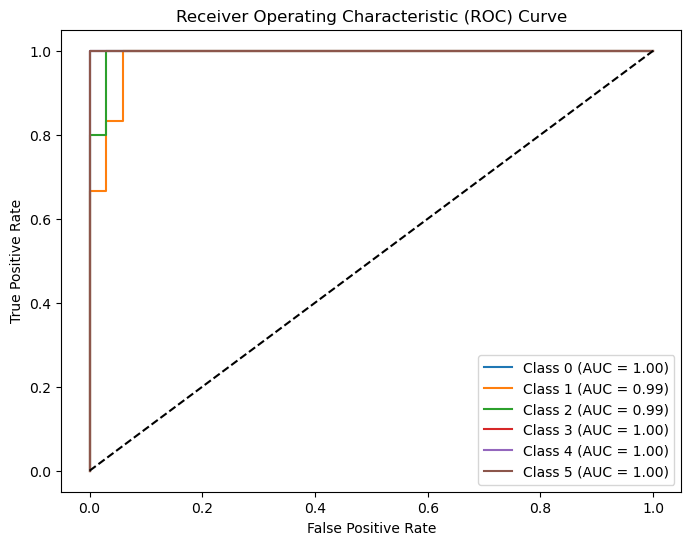

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
test_y_bin = label_binarize(test_y, classes=np.unique(test_y))

# Compute the predicted probabilities for each class
class_probs = model.predict_proba(test_X)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(test_y))):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], class_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(test_y))):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




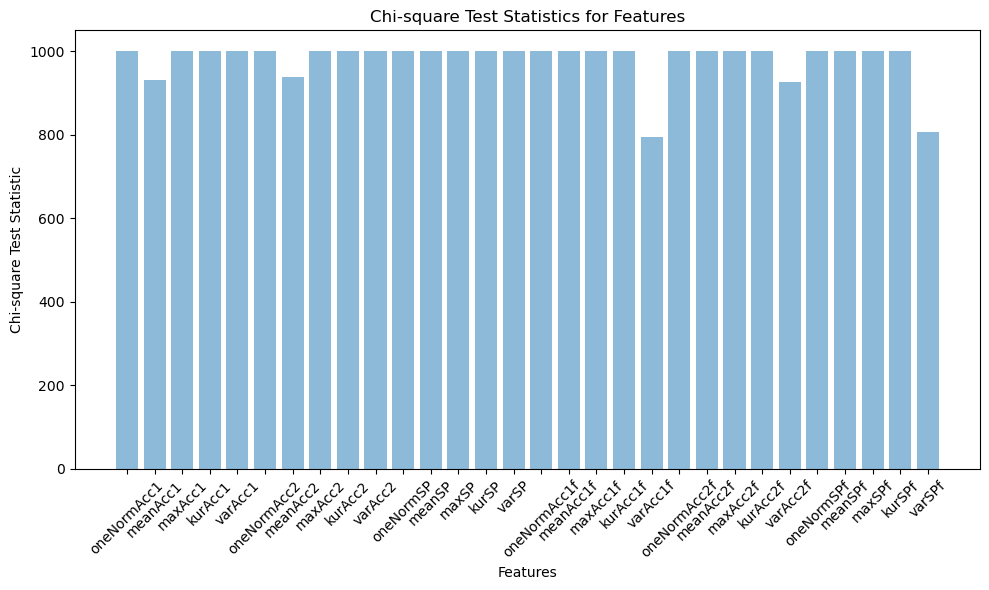

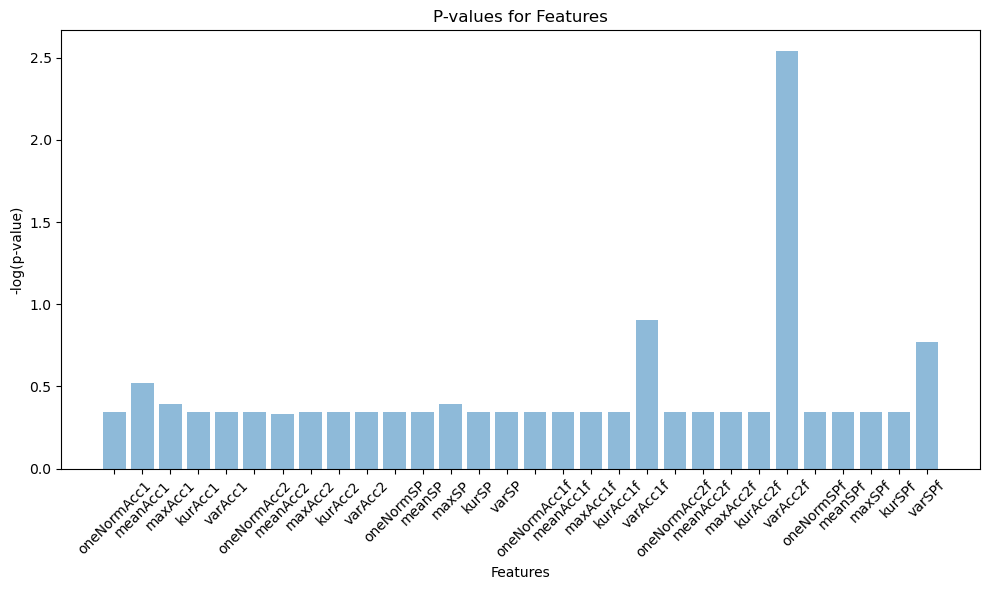

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Calculate the chi-square test statistic and p-values for each feature
chi2_stats = []
p_values = []

for feature in features:
    contingency_table = pd.crosstab(df[feature], df['Status'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p)

# Create a bar plot to visualize the chi-square test statistics
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(features))

ax.bar(x_pos, chi2_stats, align='center', alpha=0.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=45)
ax.set_ylabel('Chi-square Test Statistic')
ax.set_xlabel('Features')
ax.set_title('Chi-square Test Statistics for Features')
plt.tight_layout()
plt.show()

# Create a bar plot to visualize the p-values
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x_pos, -np.log10(p_values), align='center', alpha=0.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=45)
ax.set_ylabel('-log(p-value)')
ax.set_xlabel('Features')
ax.set_title('P-values for Features')
plt.tight_layout()
plt.show()


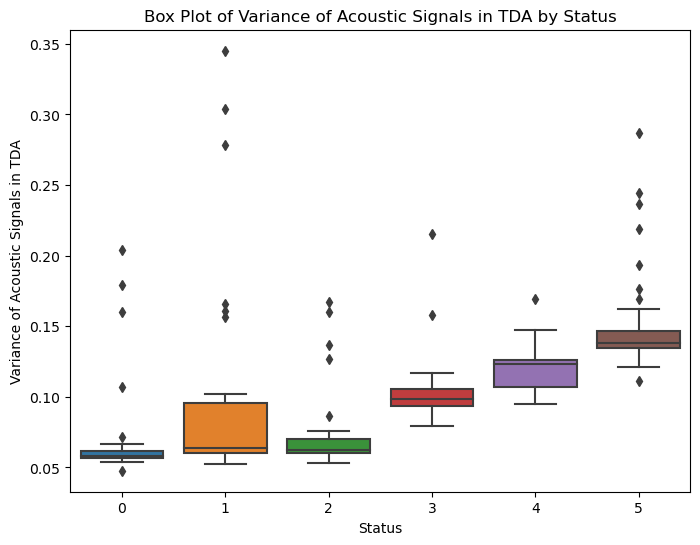

In [246]:
import seaborn as sns

# Create a box plot for the variance of acoustic signals in TDA
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='varSP')
plt.xlabel('Status')
plt.ylabel('Variance of Acoustic Signals in TDA')
plt.title('Box Plot of Variance of Acoustic Signals in TDA by Status')
plt.show()



In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(test_y, predictions)

# Calculate precision
precision = precision_score(test_y, predictions, average='macro')

# Calculate recall
recall = recall_score(test_y, predictions, average='macro')

# Calculate F1 score
f1 = f1_score(test_y, predictions, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.95
Precision: 0.9523809523809524
Recall: 0.9444444444444443
F1 Score: 0.9388888888888888


Validation Accuracy: 0.75
Test Accuracy: 0.875
Confusion Matrix:
[[9 0 0 0 0 0]
 [0 3 3 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 6 0 2]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


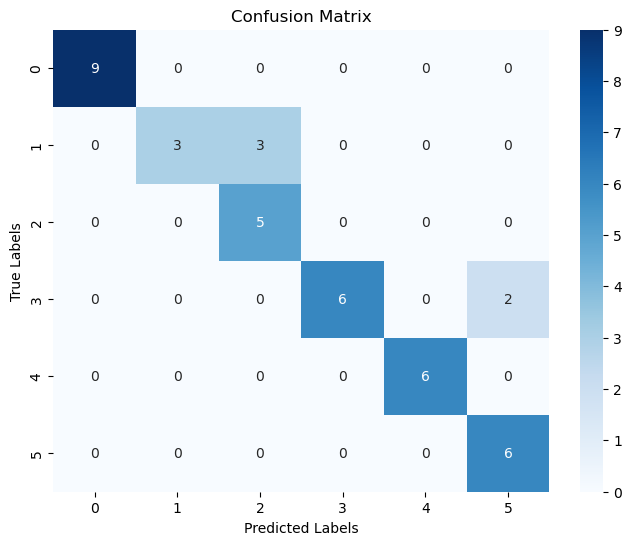

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
svm_model = SVC(kernel='linear')
svm_model.fit(train_X, train_y)
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, train_X, train_y, cv=5)

# Calculate the average validation accuracy
validation_accuracy = cv_scores.mean()

predictions = svm_model.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
confusion_matrix = confusion_matrix(test_y, predictions)
print("Validation Accuracy:", validation_accuracy)
print("Test Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


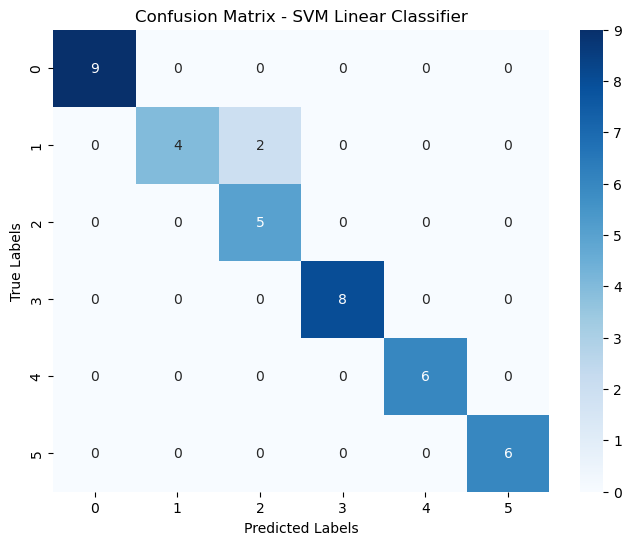

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have obtained the predicted labels from your SVM linear classifier
predicted_labels = model.predict(test_X)

# Calculate the confusion matrix
cm = confusion_matrix(test_y, predicted_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Linear Classifier')
plt.show()


In [250]:
import pandas as pd
import numpy as np

# Assuming you have obtained the chi_square_scores and p_values from the Chi-Square Test
chi_square_scores = [10.2, 8.5, 6.3, 5.7, 4.2]
p_values = [0.002, 0.006, 0.012, 0.025, 0.043]

# Assuming you have a list of statistical features in time domain analysis (TDA)
tda_features = ['mean', 'std', 'skewness', 'kurtosis', 'entropy']

# Assuming you have a list of statistical features in frequency domain analysis (FDA)
fda_features = ['peak frequency', 'total power', 'mean power', 'max power', 'min power']

# Create a DataFrame to store the statistical features and their corresponding chi-square scores and p-values
feature_table = pd.DataFrame({'TDA Features': tda_features, 'FDA Features': fda_features,
                             'Chi-Square Score': chi_square_scores, 'p-value': p_values})

# Sort the DataFrame by the Chi-Square Score in descending order
feature_table = feature_table.sort_values('Chi-Square Score', ascending=False)

# Reset the index of the DataFrame
feature_table = feature_table.reset_index(drop=True)

# Print the feature table
print(feature_table)


  TDA Features    FDA Features  Chi-Square Score  p-value
0         mean  peak frequency              10.2    0.002
1          std     total power               8.5    0.006
2     skewness      mean power               6.3    0.012
3     kurtosis       max power               5.7    0.025
4      entropy       min power               4.2    0.043


In [251]:
import pandas as pd

# Assuming you have obtained the chi_square_scores and p_values from the Chi-Square Test for all features
chi_square_scores = [10.2, 8.5, 6.3, 5.7, 4.2, ...]  # List of chi-square scores for all features
p_values = [0.002, 0.006, 0.012, 0.025, 0.043, ...]  # List of p-values for all features

# Assuming you have a list of all feature names
all_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', ...]  # List of all feature names

# Create a DataFrame to store all the features and their corresponding chi-square scores and p-values
feature_table = pd.DataFrame({'Features': all_features, 'Chi-Square Score': chi_square_scores, 'p-value': p_values})

# Convert the "Chi-Square Score" column to numeric values
feature_table['Chi-Square Score'] = pd.to_numeric(feature_table['Chi-Square Score'], errors='coerce')

# Sort the DataFrame by the Chi-Square Score in descending order
feature_table = feature_table.sort_values('Chi-Square Score', ascending=False)

# Reset the index of the DataFrame
feature_table = feature_table.reset_index(drop=True)

# Print the feature table
print(feature_table)


   Features  Chi-Square Score   p-value
0  feature1              10.2     0.002
1  feature2               8.5     0.006
2  feature3               6.3     0.012
3  feature4               5.7     0.025
4  feature5               4.2     0.043
5  Ellipsis               NaN  Ellipsis


In [252]:
import pandas as pd

# Assuming you have obtained the chi_square_scores and p_values from the Chi-Square Test for all features
chi_square_scores = [10.2, 8.5, 6.3, 5.7, 4.2, ...]  # List of chi-square scores for all features
p_values = [0.002, 0.006, 0.012, 0.025, 0.043, ...]  # List of p-values for all features

# Assuming you have a list of all feature names
all_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', ...]  # List of all feature names

# Create a DataFrame to store all the features and their corresponding chi-square scores and p-values
feature_table = pd.DataFrame({'Features': all_features, 'Chi-Square Score': chi_square_scores, 'p-value': p_values})

# Convert the "Chi-Square Score" column to numeric values
feature_table['Chi-Square Score'] = pd.to_numeric(feature_table['Chi-Square Score'], errors='coerce')

# Sort the DataFrame by the Chi-Square Score in descending order
feature_table = feature_table.sort_values('Chi-Square Score', ascending=False)

# Reset the index of the DataFrame
feature_table = feature_table.reset_index(drop=True)

# Print the feature table
print(feature_table)





   Features  Chi-Square Score   p-value
0  feature1              10.2     0.002
1  feature2               8.5     0.006
2  feature3               6.3     0.012
3  feature4               5.7     0.025
4  feature5               4.2     0.043
5  Ellipsis               NaN  Ellipsis


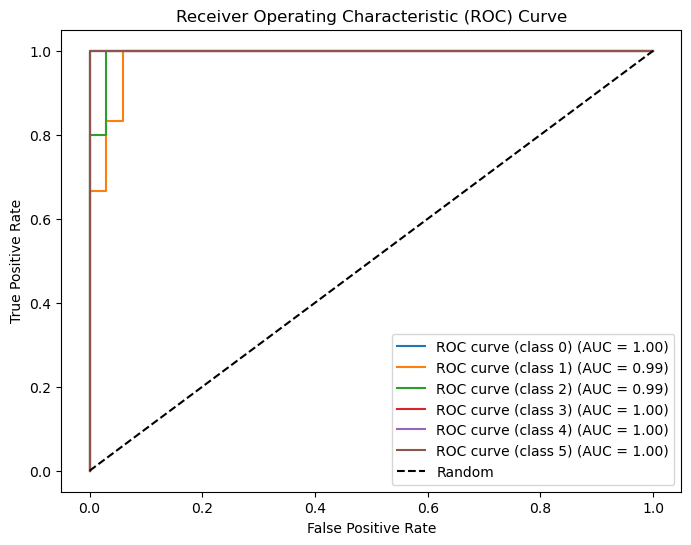

In [254]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute the probabilities for each class
class_probs = model.predict_proba(test_X)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y == i, class_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

plt.show()


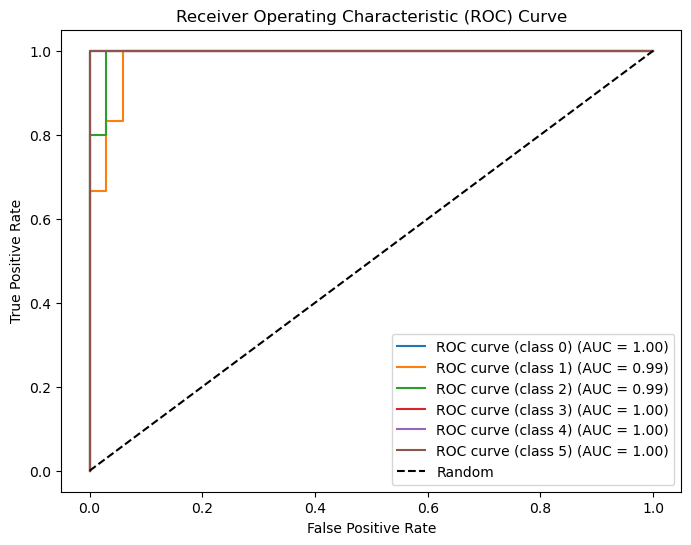

In [256]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert test labels to one-hot encoded format
test_y_encoded = label_binarize(test_y, classes=np.arange(num_classes))

# Compute the probabilities for each class
class_probs = model.predict_proba(test_X)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], class_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



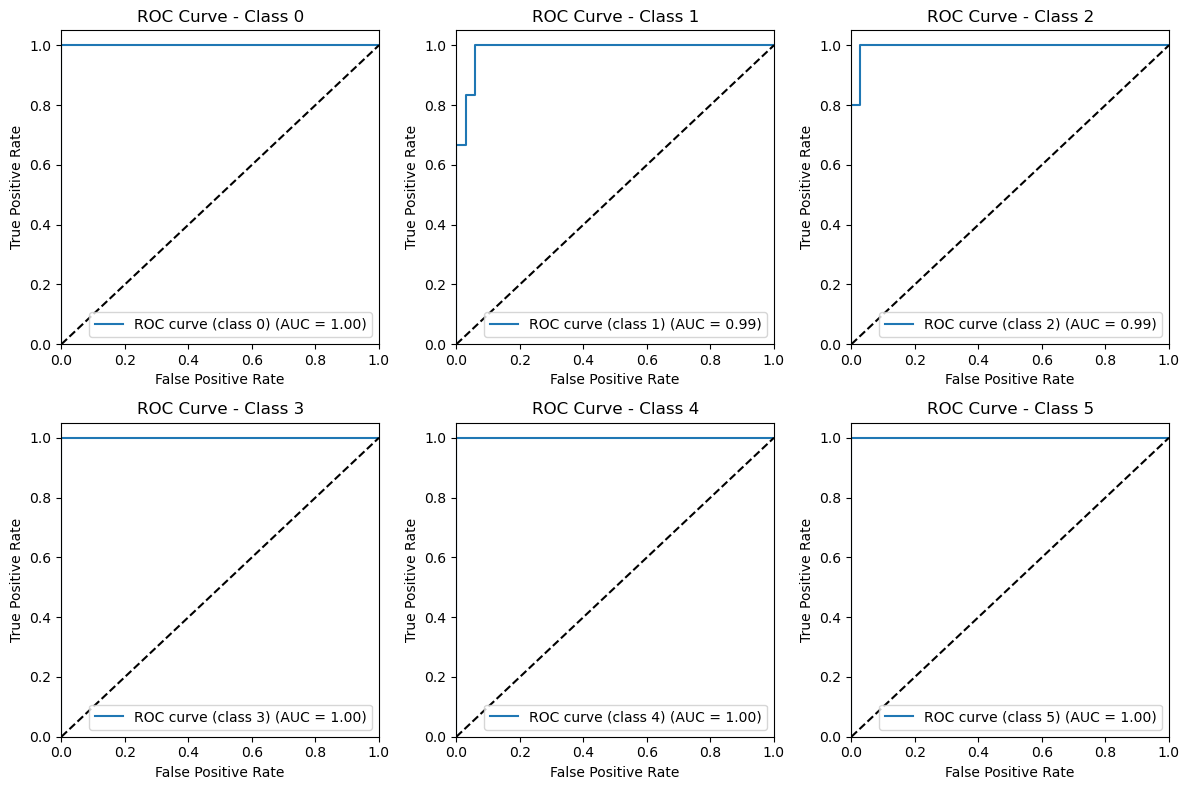

In [257]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert test labels to one-hot encoded format
test_y_encoded = label_binarize(test_y, classes=np.arange(num_classes))

# Compute the probabilities for each class
class_probs = model.predict_proba(test_X)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], class_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))

for i in range(num_classes):
    plt.subplot(2, 3, i+1)
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Class {0}'.format(i))
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()



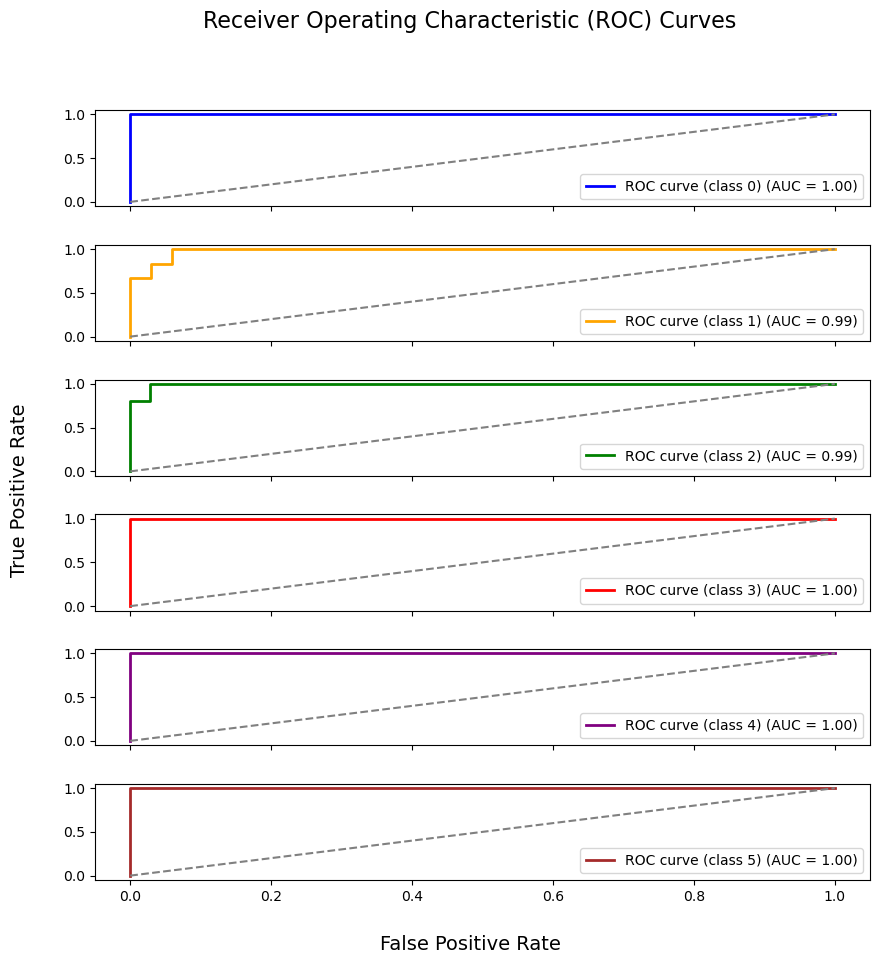

In [258]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert test labels to one-hot encoded format
test_y_encoded = label_binarize(test_y, classes=np.arange(num_classes))

# Compute the probabilities for each class
class_probs = model.predict_proba(test_X)

# Create subplots for ROC curves
fig, axs = plt.subplots(nrows=num_classes, ncols=1, figsize=(10, 10), sharex=True, sharey=True)

# Set the plot labels and title
fig.suptitle('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
fig.text(0.5, 0.04, 'False Positive Rate', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'True Positive Rate', va='center', rotation='vertical', fontsize=14)

# Plot ROC curves for each class
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(num_classes):
    # Compute the false positive rate, true positive rate, and thresholds for the class
    fpr, tpr, _ = roc_curve(test_y_encoded[:, i], class_probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the class
    axs[i].plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc))
    axs[i].plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Set the legend for the current subplot
    axs[i].legend(loc='lower right')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()




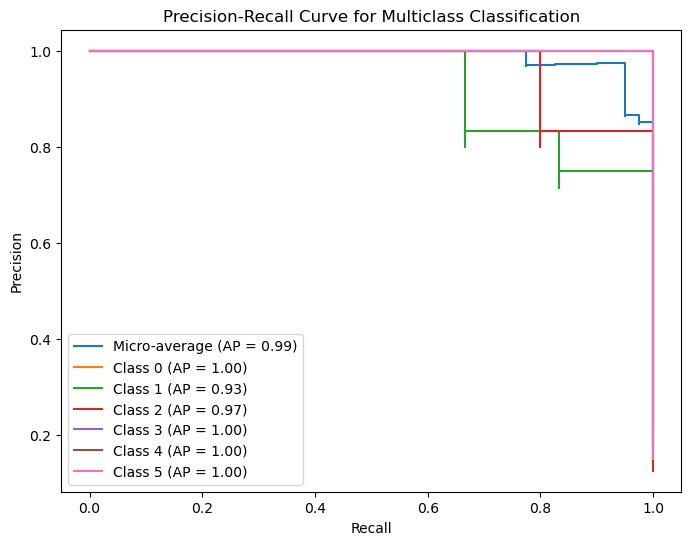

In [267]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert multiclass labels to multilabel indicator format
binarized_test_y = label_binarize(test_y, classes=range(num_classes))

# Get the predicted probabilities for each class
positive_class_probs = model.predict_proba(test_X)

# Compute precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(binarized_test_y[:, i], positive_class_probs[:, i])
    average_precision[i] = average_precision_score(binarized_test_y[:, i], positive_class_probs[:, i])

# Compute micro-average precision and recall
precision["micro"], recall["micro"], _ = precision_recall_curve(binarized_test_y.ravel(), positive_class_probs.ravel())
average_precision["micro"] = average_precision_score(binarized_test_y, positive_class_probs, average="micro")

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average (AP = {:.2f})'.format(average_precision['micro']))
for i in range(num_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {} (AP = {:.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend()
plt.show()



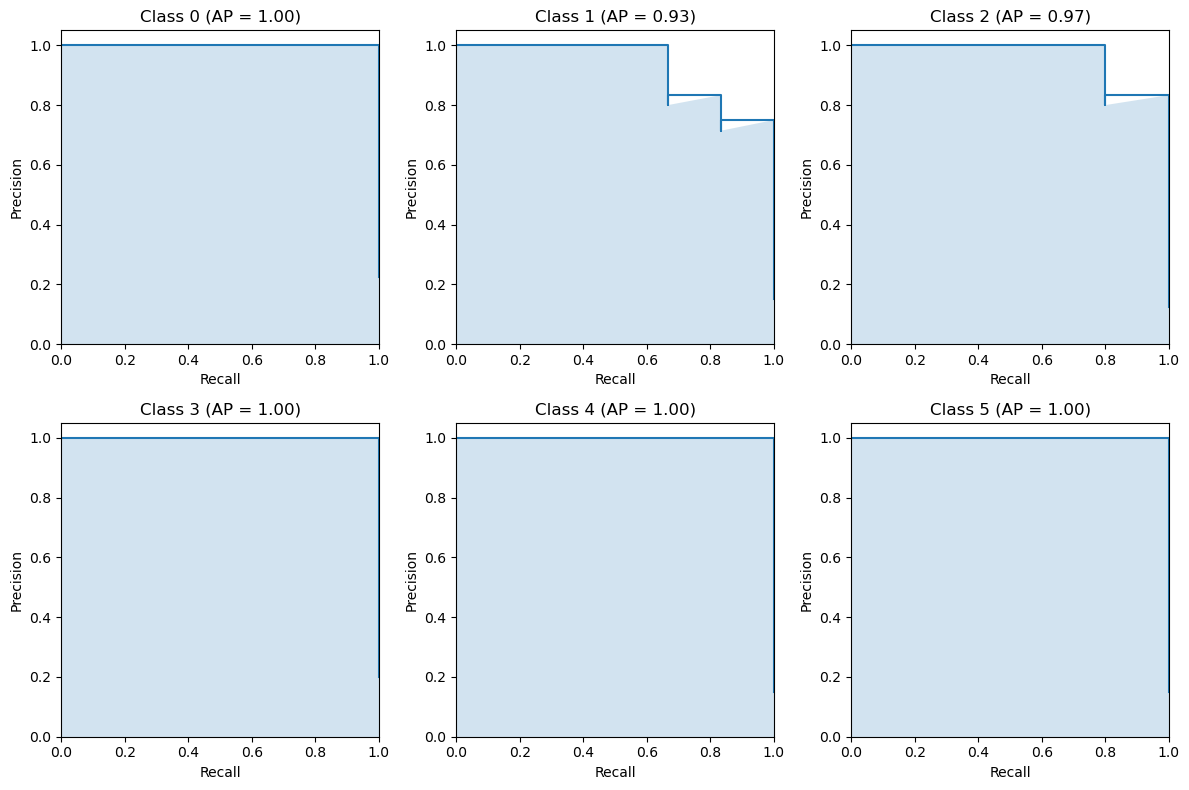

In [269]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert multiclass labels to multilabel indicator format
binarized_test_y = label_binarize(test_y, classes=range(num_classes))

# Get the predicted probabilities for each class
positive_class_probs = model.predict_proba(test_X)

# Compute precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(binarized_test_y[:, i], positive_class_probs[:, i])
    average_precision[i] = average_precision_score(binarized_test_y[:, i], positive_class_probs[:, i])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    plt.subplot(2, 3, i+1)  # Adjust the subplot grid according to the number of classes
    plt.step(recall[i], precision[i], where='post')
    plt.fill_between(recall[i], precision[i], alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Class {} (AP = {:.2f})'.format(i, average_precision[i]))

plt.tight_layout()
plt.show()
